In [1]:
import pandas as pd
import numpy as np

In [2]:
df1= pd.read_csv('BTC-USD (4).csv')
df = pd.read_csv('BTC-USD (4).csv', index_col=[0],parse_dates=[0])  

#By using index_col=0 and parse_dates=[0],
#the resulting DataFrame will have its first column (index column) set as a datetime index,
#and the data will be organized in a time-series format, making it easier 
#to work with time-related data.

In [3]:
type(df1['Date'][0])

str

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2391 entries, 2017-01-01 to 2023-07-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2390 non-null   float64
 1   High       2390 non-null   float64
 2   Low        2390 non-null   float64
 3   Close      2390 non-null   float64
 4   Adj Close  2390 non-null   float64
 5   Volume     2390 non-null   float64
dtypes: float64(6)
memory usage: 130.8 KB


In [5]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   2390.000000   2390.000000   2390.000000   2390.000000   2390.000000   
mean   18298.713070  18746.067650  17809.573818  18309.192042  18309.192042   
std    16230.938365  16638.458046  15760.662434  16225.181709  16225.181709   
min      775.177979    823.307007    755.755981    777.757019    777.757019   
25%     6597.587402   6723.835938   6468.447510   6596.792481   6596.792481   
50%    10412.611817  10726.542481  10196.382812  10425.701660  10425.701660   
75%    27810.926758  28388.835938  27255.466797  27898.769531  27898.769531   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.390000e+03  
mean   2.235043e+10  
std    1.959995e+10  
min    6.085170e+07  
25%    5.955257e+09  
50%    1.948106e+10  
75%    3.247411e+10  
max    3.509679e+11

In [6]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-01   963.658020  1003.080017   958.698975   998.325012   998.325012   
2017-01-02   998.617004  1031.390015   996.702026  1021.750000  1021.750000   
2017-01-03  1021.599976  1044.079956  1021.599976  1043.839966  1043.839966   
2017-01-04  1044.400024  1159.420044  1044.400024  1154.729980  1154.729980   
2017-01-05  1156.729980  1191.099976   910.416992  1013.380005  1013.380005   

                 Volume  
Date                     
2017-01-01  147775008.0  
2017-01-02  222184992.0  
2017-01-03  185168000.0  
2017-01-04  344945984.0  
2017-01-05  510199008.0

In [10]:
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
fig = px.line(df1,x='Date',y=df.columns,
             hover_data={'Date': "|%B %d, %Y"}
             )

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [18]:
!pip install statsmodels

In [12]:
from statsmodels.tsa.ar_model import AutoReg

<Axes: xlabel='Date'>

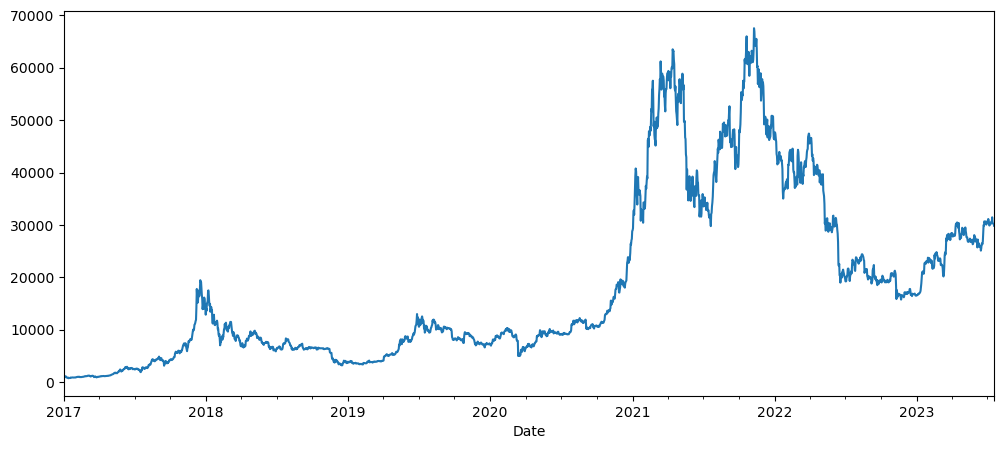

In [13]:
df['Open'].plot(figsize=(12,5))

Dickey Fuller Test for stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def dickey_fuller(dataset):
    dftest= adfuller(dataset, autolag='AIC')
    print('test statistic: ',dftest[0],
         '\np value: ', dftest[1],
         '\nnumber of lags: ',dftest[2],
         '\nnumber of values used for calculation: ',dftest[3],
         '\ncritical values: ',dftest[4])

In [16]:
dickey_fuller(df["Open"])

test statistic:  -1.6780445391992573 
p value:  0.44245860768166023 
number of lags:  27 
number of values used for calculation:  2363 
critical values:  {'1%': -3.433120384218136, '5%': -2.8627639098437925, '10%': -2.567421539882828}


 - df[0] : If the test statistic is more negative than the critical values, the null hypothesis of non-stationarity is rejected, and the time series is considered stationary. It indicates that the time series is stationary. 
 - df[1] : p value, smaller p values support stationarity by providing a stonger evidence against null hypothesis
 - df[2] : number of lags used while computing test statistic
 - df[3] : number of values used for adf , critical values calculation
 - df[4] : critical values

square root transformation to make the data stationary
- Use NumPy’s square root function to transform the required column
- Then shift the transformation by one, take the difference between both the original transformation and shift by using .diff() function. 
- by doing so, we will have one timestamp less than the orignal dataframe

In [17]:
df_log=np.sqrt(df[['Open']])
df_diff=df_log.diff().fillna(0)

checking the results

In [18]:
dickey_fuller(df_diff)

test statistic:  -14.313957313809993 
p value:  1.1714706456835012e-26 
number of lags:  9 
number of values used for calculation:  2381 
critical values:  {'1%': -3.433099417887619, '5%': -2.862754651535997, '10%': -2.5674166105654788}


the data is now stationary

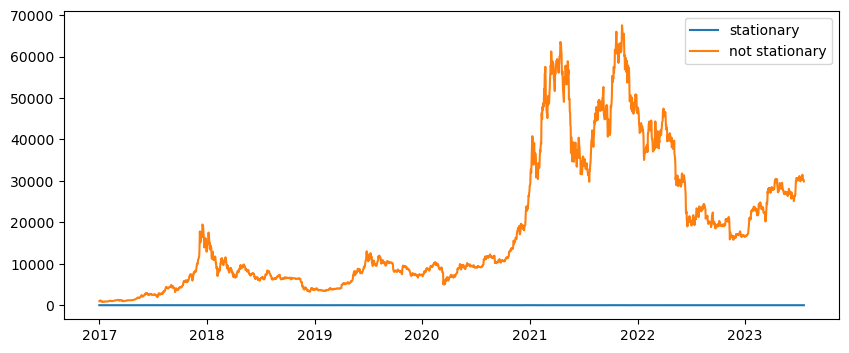

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df_diff,label='stationary')
plt.plot(df['Open'], label='not stationary')
plt.legend()

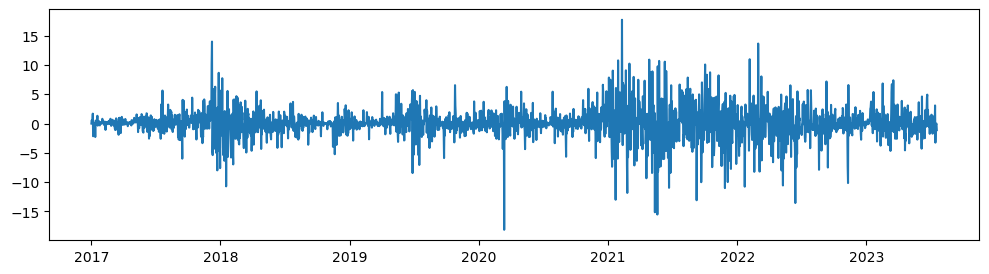

In [20]:
plt.figure(figsize=(12,3))
plt.plot(df_diff,label='stationary')

In [21]:
fig = px.line(df_diff)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Rolling Statistics

In [22]:
rollmean = df_diff.rolling(30).mean()
rollstd = df_diff.rolling(30).std()

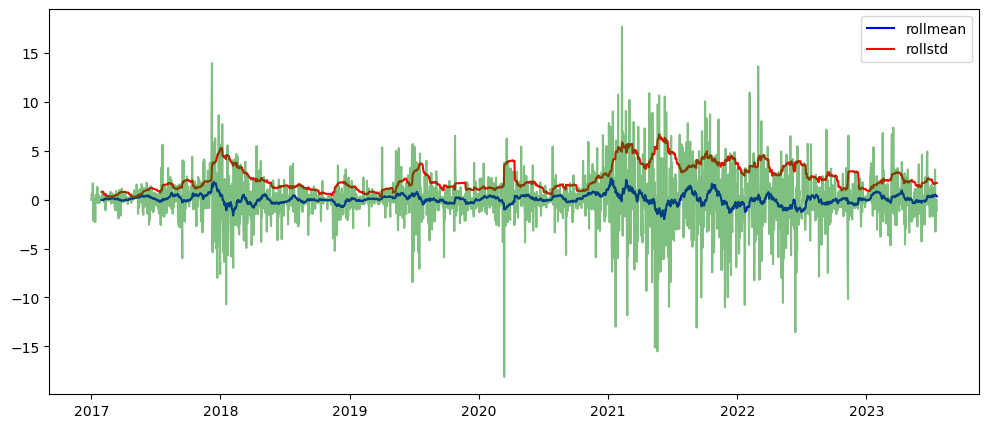

In [23]:
plt.figure(figsize=(12,5))
plt.plot(rollmean,label='rollmean',color="blue")
plt.plot(rollstd,label='rollstd',color='red')
plt.plot(df_diff,color='green',alpha=0.5)
plt.legend()

In [24]:
from statsmodels.tsa.stattools import pacf

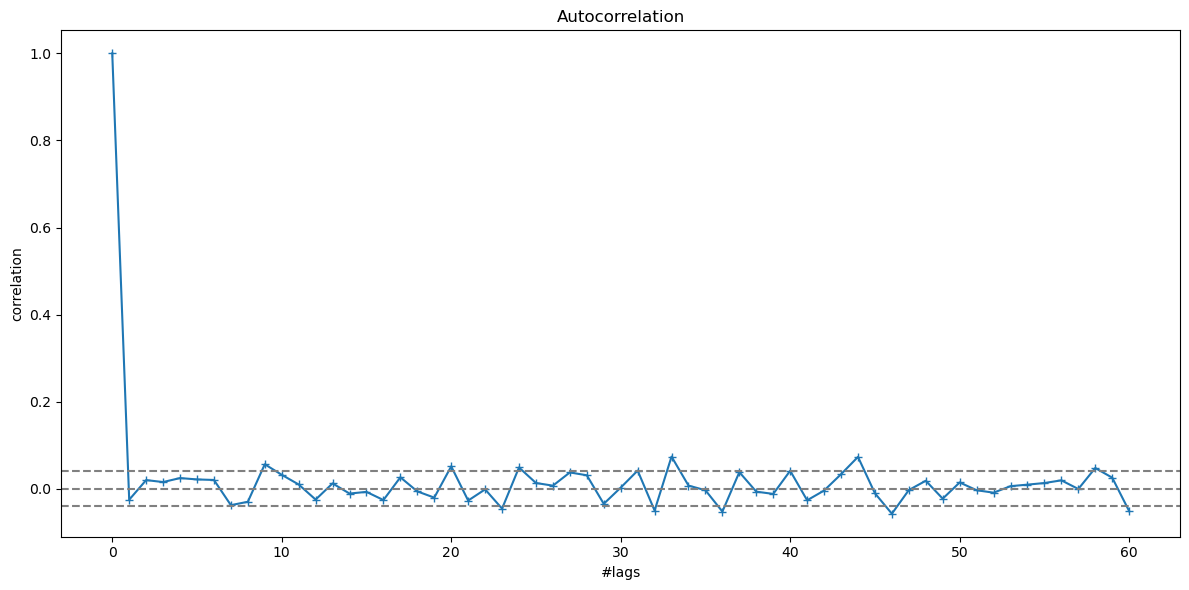

In [25]:
PACF= pacf(df_diff, nlags=60)

#Plot PACF:
plt.figure(figsize=(12, 6))
plt.plot(PACF,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

In [26]:
fig = px.line(PACF)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

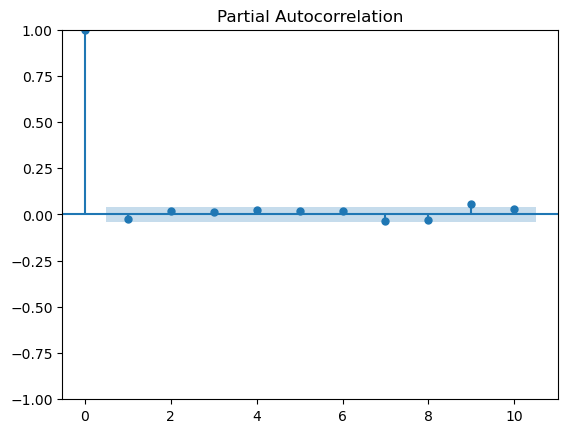

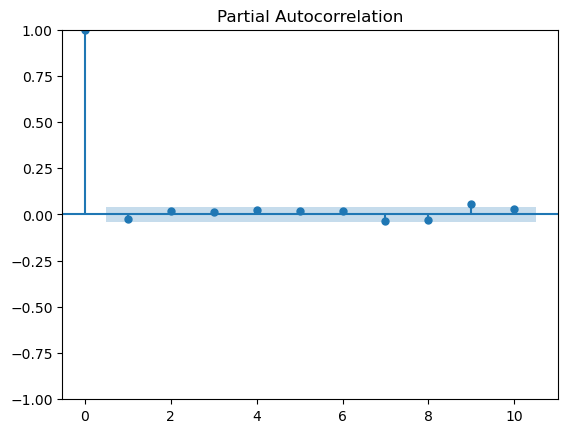

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_diff,lags=10)

In [28]:
from statsmodels.tsa.ar_model import AutoReg

In [29]:
X = df_diff

In [30]:
X

Open
Date                
2017-01-01  0.000000
2017-01-02  0.558060
2017-01-03  0.361576
2017-01-04  0.354701
2017-01-05  1.693555
...              ...
2023-07-15 -3.250940
2023-07-16 -0.098531
2023-07-17 -0.137493
2023-07-18  0.000000
2023-07-19 -1.121922

[2391 rows x 1 columns]

In [31]:
train = X[:-5]
test = X[-5:]

In [32]:
train.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-08',
               '2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14'],
              dtype='datetime64[ns]', name='Date', length=2386, freq=None)

In [33]:
ar_fit = AutoReg(train, lags = 9).fit()

C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [34]:
ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2386
Model:                     AutoReg(9)   Log Likelihood               -5629.322
Method:               Conditional MLE   S.D. of innovations              2.584
Date:                Thu, 05 Oct 2023   AIC                          11280.644
Time:                        10:24:43   BIC                          11344.153
Sample:                    01-10-2017   HQIC                         11303.760
                         - 07-14-2023                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.053      1.088      0.276      -0.046       0.162
Open.L1       -0.0244      0.020     -1.192      0.233      -0.065       0.016
Open.L2        0.0226      0.020      1.104      0.270      -0.018       0.063
Open.L3        0.0160      0.020      0.783      0.434      -0.024       0.056
Open.L4        0.0248      0.020      1.212      0.225      -0.015       0.065
Open.L5        0.0219      0.020      1.072      0.284      -0.018       0.062
Open.L6        0.0189      0.020      0.922      0.356      -0.021       0.059
Open.L7       -0.0391      0.020     -1.910      0.056      -0.079       0.001
Open.L8       -0.0285      0.020     -1.393      0.164      -0.069       0.012
Open.L9        0.0560      0.020      2.735      0.006       0.016       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2929           -0.4385j            1.3653           -0.4480
AR.2           -1.2929           +0.4385j            1.3653            0.4480
AR.3           -0.6712           -1.1370j            1.3203           -0.3349
AR.4           -0.6712           +1.1370j            1.3203            0.3349
AR.5            0.2933           -1.2896j            1.3226           -0.2144
AR.6            0.2933           +1.2896j            1.3226            0.2144
AR.7            1.1995           -0.8515j            1.4710           -0.0982
AR.8            1.1995           +0.8515j            1.4710            0.0982
AR.9            1.4518           -0.0000j            1.4518           -0.0000
-----------------------------------------------------------------------------
"""

In [35]:
pred_diff= ar_fit.predict(start=len(train), end=len(X)-1, dynamic= False)
len(pred_diff)

C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



5

In [124]:
len(X)

2391

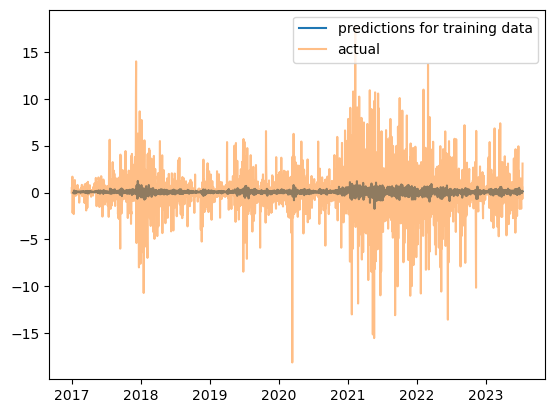

In [36]:
plt.plot(ar_fit.fittedvalues, label='predictions for training data')
plt.plot(train, alpha =0.5, label='actual')
plt.legend()

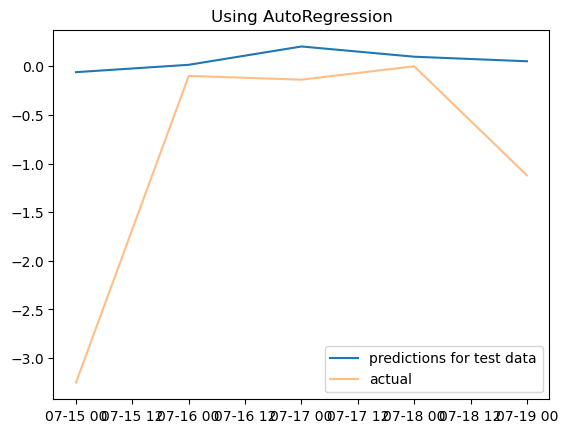

In [57]:
plt.plot(pred_diff, label='predictions for test data')
plt.plot(test, alpha =0.5, label='actual')
plt.title("Using AutoRegression")
plt.legend()

In [38]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error

In [39]:
len(X)

2391

In [40]:
#yhat = model_fit.predict(start=3126,end=3226)
pred_diff
details=[]
mse = mean_squared_error(X.values[-5:],pred_diff)
print("The RMSE is:",np.sqrt(mse))

mape = mean_absolute_percentage_error(X.values[-5:],pred_diff)
print("The MAPE is:",mape)

mae = mean_absolute_error(X.values[-5:],pred_diff)
print("The MAE is:",mae)

#details['Model']={"Auto Regression"}
Auto_Reg = {}
Auto_Reg['RMSE']=(np.sqrt(mse))
Auto_Reg['MAPE']=(mape)
Auto_Reg['MAE']=(mae)

details.append(Auto_Reg)

The RMSE is: 1.5295189109858094
The MAPE is: 88785038868662.66
The MAE is: 0.9836544630025902


In [71]:
forecast_ar = ar_fit.predict(start=len(X),end=len(X)+4)
print(forecast_ar)

2023-07-20    0.168482
2023-07-21   -0.008161
2023-07-22   -0.053588
2023-07-23    0.243176
2023-07-24    0.045923
Freq: D, dtype: float64


C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



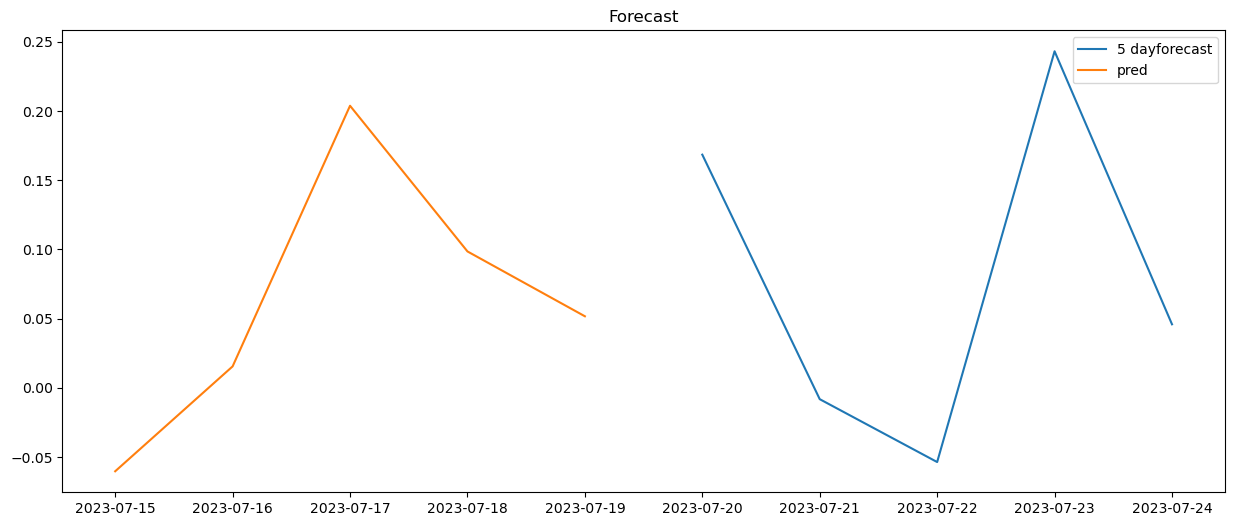

In [77]:
plt.figure(figsize=(15,6))
#plt.plot(train, label='training')
# plt.plot(test, label='test')
plt.plot(forecast_ar, label='5 dayforecast')
plt.plot(pred_diff,label ="pred")
plt.title('Forecast')
plt.legend()



Seasonal Decomposition

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
X.index = pd.to_datetime(X.index)

In [45]:
X = X.asfreq('D')

In [46]:
X.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-19'],
              dtype='datetime64[ns]', name='Date', length=2391, freq='D')

In [47]:
X.isnull().sum()

Open    0
dtype: int64

In [48]:
decomposition = seasonal_decompose(X["Open"], model ="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [49]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [50]:
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Trend', 
                                                                       'Seasonality', 'Residuals'))

fig.add_trace(go.Scatter(x=X.index, y=X["Open"], name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=X.index, y=trend, name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=X.index, y=seasonal, name='Seasonality'), row=3, col=1)
fig.add_trace(go.Scatter(x=X.index, y=residual, name='Residuals'), row=4, col=1)

fig.update_layout(title='Seasonal Decomposition')

there seems to be a weekly seasonality in the data

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

result = model.fit()

C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [53]:
predictions = result.predict(start=len(train), end=len(X)-1, dynamic= False)
predictions

2023-07-15    0.026342
2023-07-16    0.206173
2023-07-17    0.097108
2023-07-18    0.186188
2023-07-19    0.094727
Freq: D, Name: predicted_mean, dtype: float64

In [62]:
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(X.values[-5:],predictions)
print("The MAPE is:",mape)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

The MAPE is: 167703028639740.97
Mean Squared Error:  2.4806720749509927
Root Mean Squared Error:  1.575014944357987


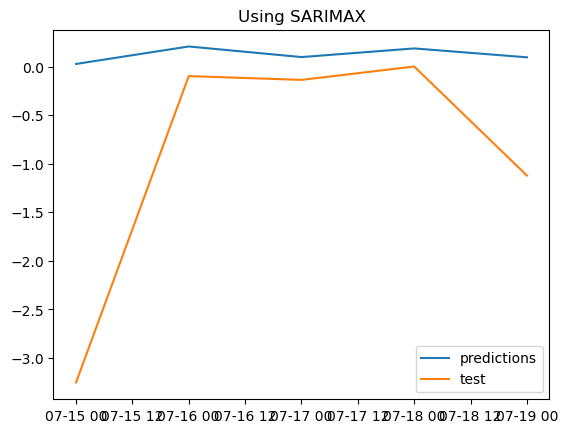

In [56]:
plt.plot(predictions,label="predictions")
plt.plot(test,label="test")
plt.title("Using SARIMAX")
plt.legend()

In [59]:
pred = result.get_forecast(steps=5)
pred

In [60]:
forecast_sarima = pred.predicted_mean

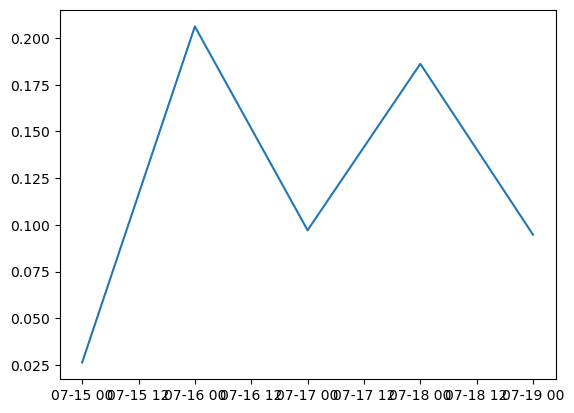

In [61]:
plt.plot(forecast_sarima)

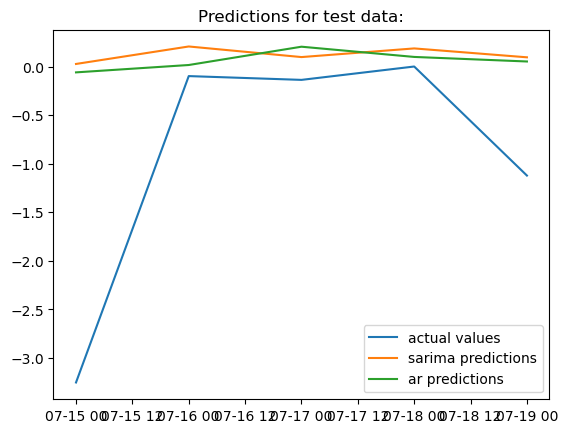

In [73]:
plt.plot(test,label="actual values")
plt.plot(predictions,label= "sarima predictions")
plt.plot(pred_diff,label= "ar predictions")
plt.title("Predictions for test data:")
plt.legend()

In [78]:
# plt.plot(forecast_ar,label="ar forecast")
# plt.plot(forecast_sarima,label ="sarima forecast")
# plt.title("Forecast, 5 days into the future")
# plt.legend()